# Public vs. Housing Banishment

This notebook will focus on separating and creating two distinct shapefiles for:
- public banishment
- housing banishment

Each will also have a 500ft buffer and a 250ft buffer

In [68]:
import geopandas as gpd
import pandas as pd
import pickle
import numpy as np
import contextily as ctx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib_scalebar.scalebar import ScaleBar

In [51]:
chicago_boundaries = pd.read_pickle('./data/pickle/chicago_boundaries')
bike_routes_buffer = pd.read_pickle('./data/pickle/bike_routes_buffer')
daycare_buffer = pd.read_pickle('./data/pickle/daycare_buffer')
forestry_buffer = pd.read_pickle('./data/pickle/forestry_buffer')
parks_buffer = pd.read_pickle('./data/pickle/parks_buffer')
schools_buffer = pd.read_pickle('./data/pickle/schools_buffer')
opens_spaces_buffer = pd.read_pickle('./data/pickle/open_spaces_buffer')

## Housing Banishment

In [53]:
housing_banishment = [daycare_buffer, parks_buffer, schools_buffer]

### 500 ft buffer

In [91]:
for gdf in housing_banishment:
    gdf.set_geometry(col='buffer_500', inplace=True)

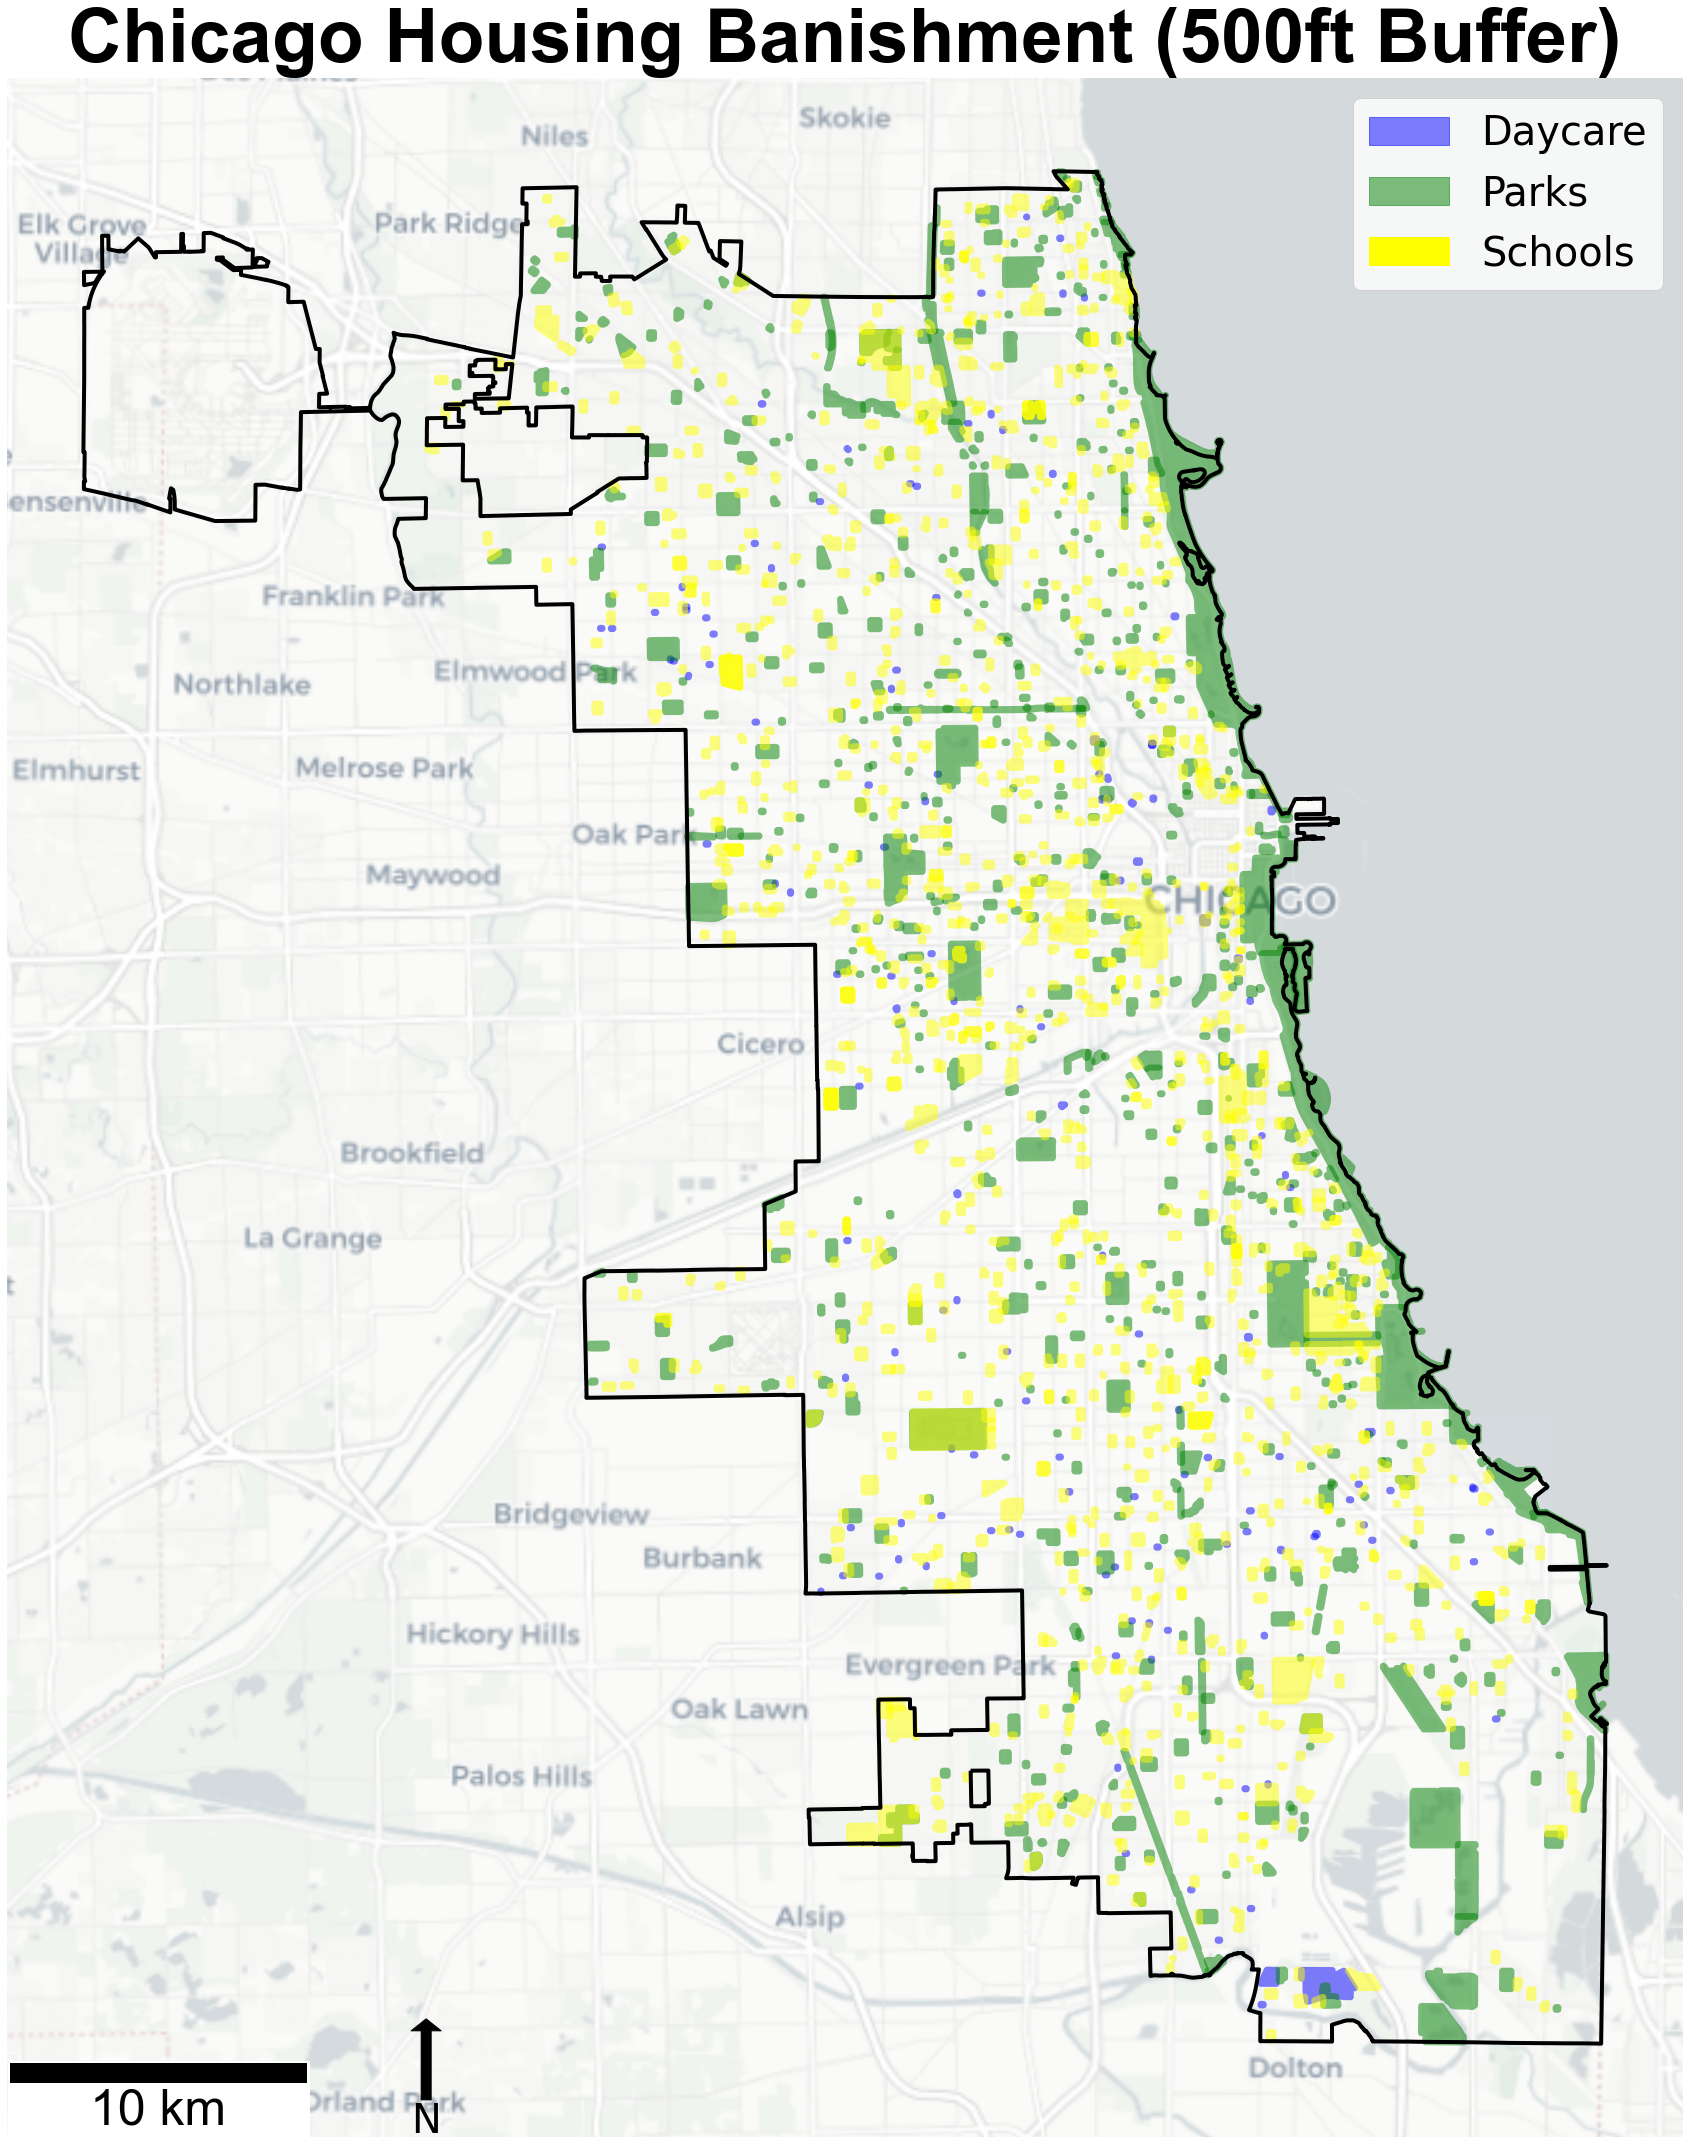

In [112]:
# 500 ft buffer map
# set basemap with Chicago Boundaries
basemap = chicago_boundaries.boundary.plot(color='k',
                                           figsize=(30,30),
                                          linewidth=4,
                                           label='Chicago Boundaries')

# add contextily basemap
ctx.add_basemap(basemap,crs=32616,source=ctx.providers.CartoDB.Positron)

# plot each geometry
daycare_buffer.plot(color='blue', ax=basemap, alpha=0.5)
daycare_leg = mpatches.Patch(color='blue', label='Daycare', alpha=0.5)

parks_buffer.plot(color='green',ax=basemap, alpha=0.5)
parks_leg = mpatches.Patch(color='green',label='Parks', alpha=0.5)

schools_buffer.plot(color='yellow',ax=basemap, alpha=0.5)
schools_leg = mpatches.Patch(color='yellow', label='Schools')

# turn off axies
basemap.axis('off')

# legend
basemap.legend(prop={'size':40}, handles=[
                                          daycare_leg, 
                                          parks_leg, 
                                          schools_leg])

# turn off axies
basemap.axis('off')

# set title
basemap.set_title('Chicago Housing Banishment (500ft Buffer)', fontdict={'size':75,
                                                            'weight':'bold',
                                                            'family':'arial'})
# add scale bar
basemap.add_artist(ScaleBar(dx=1.5,
                            location="lower left", 
                            font_properties={'family':'arial','size':50}, 
                            frameon=True,fixed_units='m'))

# add north arrow
x, y, arrow_length = 0.25, 0.0575, 0.05
basemap.annotate('N', xy=(x,y), xytext=(x, y-arrow_length),
                arrowprops=dict(facecolor='k', width=10, headwidth=30),
                va='center',ha='center', fontsize=40,
                xycoords=basemap.transAxes)

plt.tight_layout()
plt.savefig('./images/chicago_housing_banishment_500ft_buffer.png', transparent=True)
plt.show()

### 250 ft buffer

In [113]:
for gdf in housing_banishment:
    gdf.set_geometry(col='buffer_250', inplace=True)

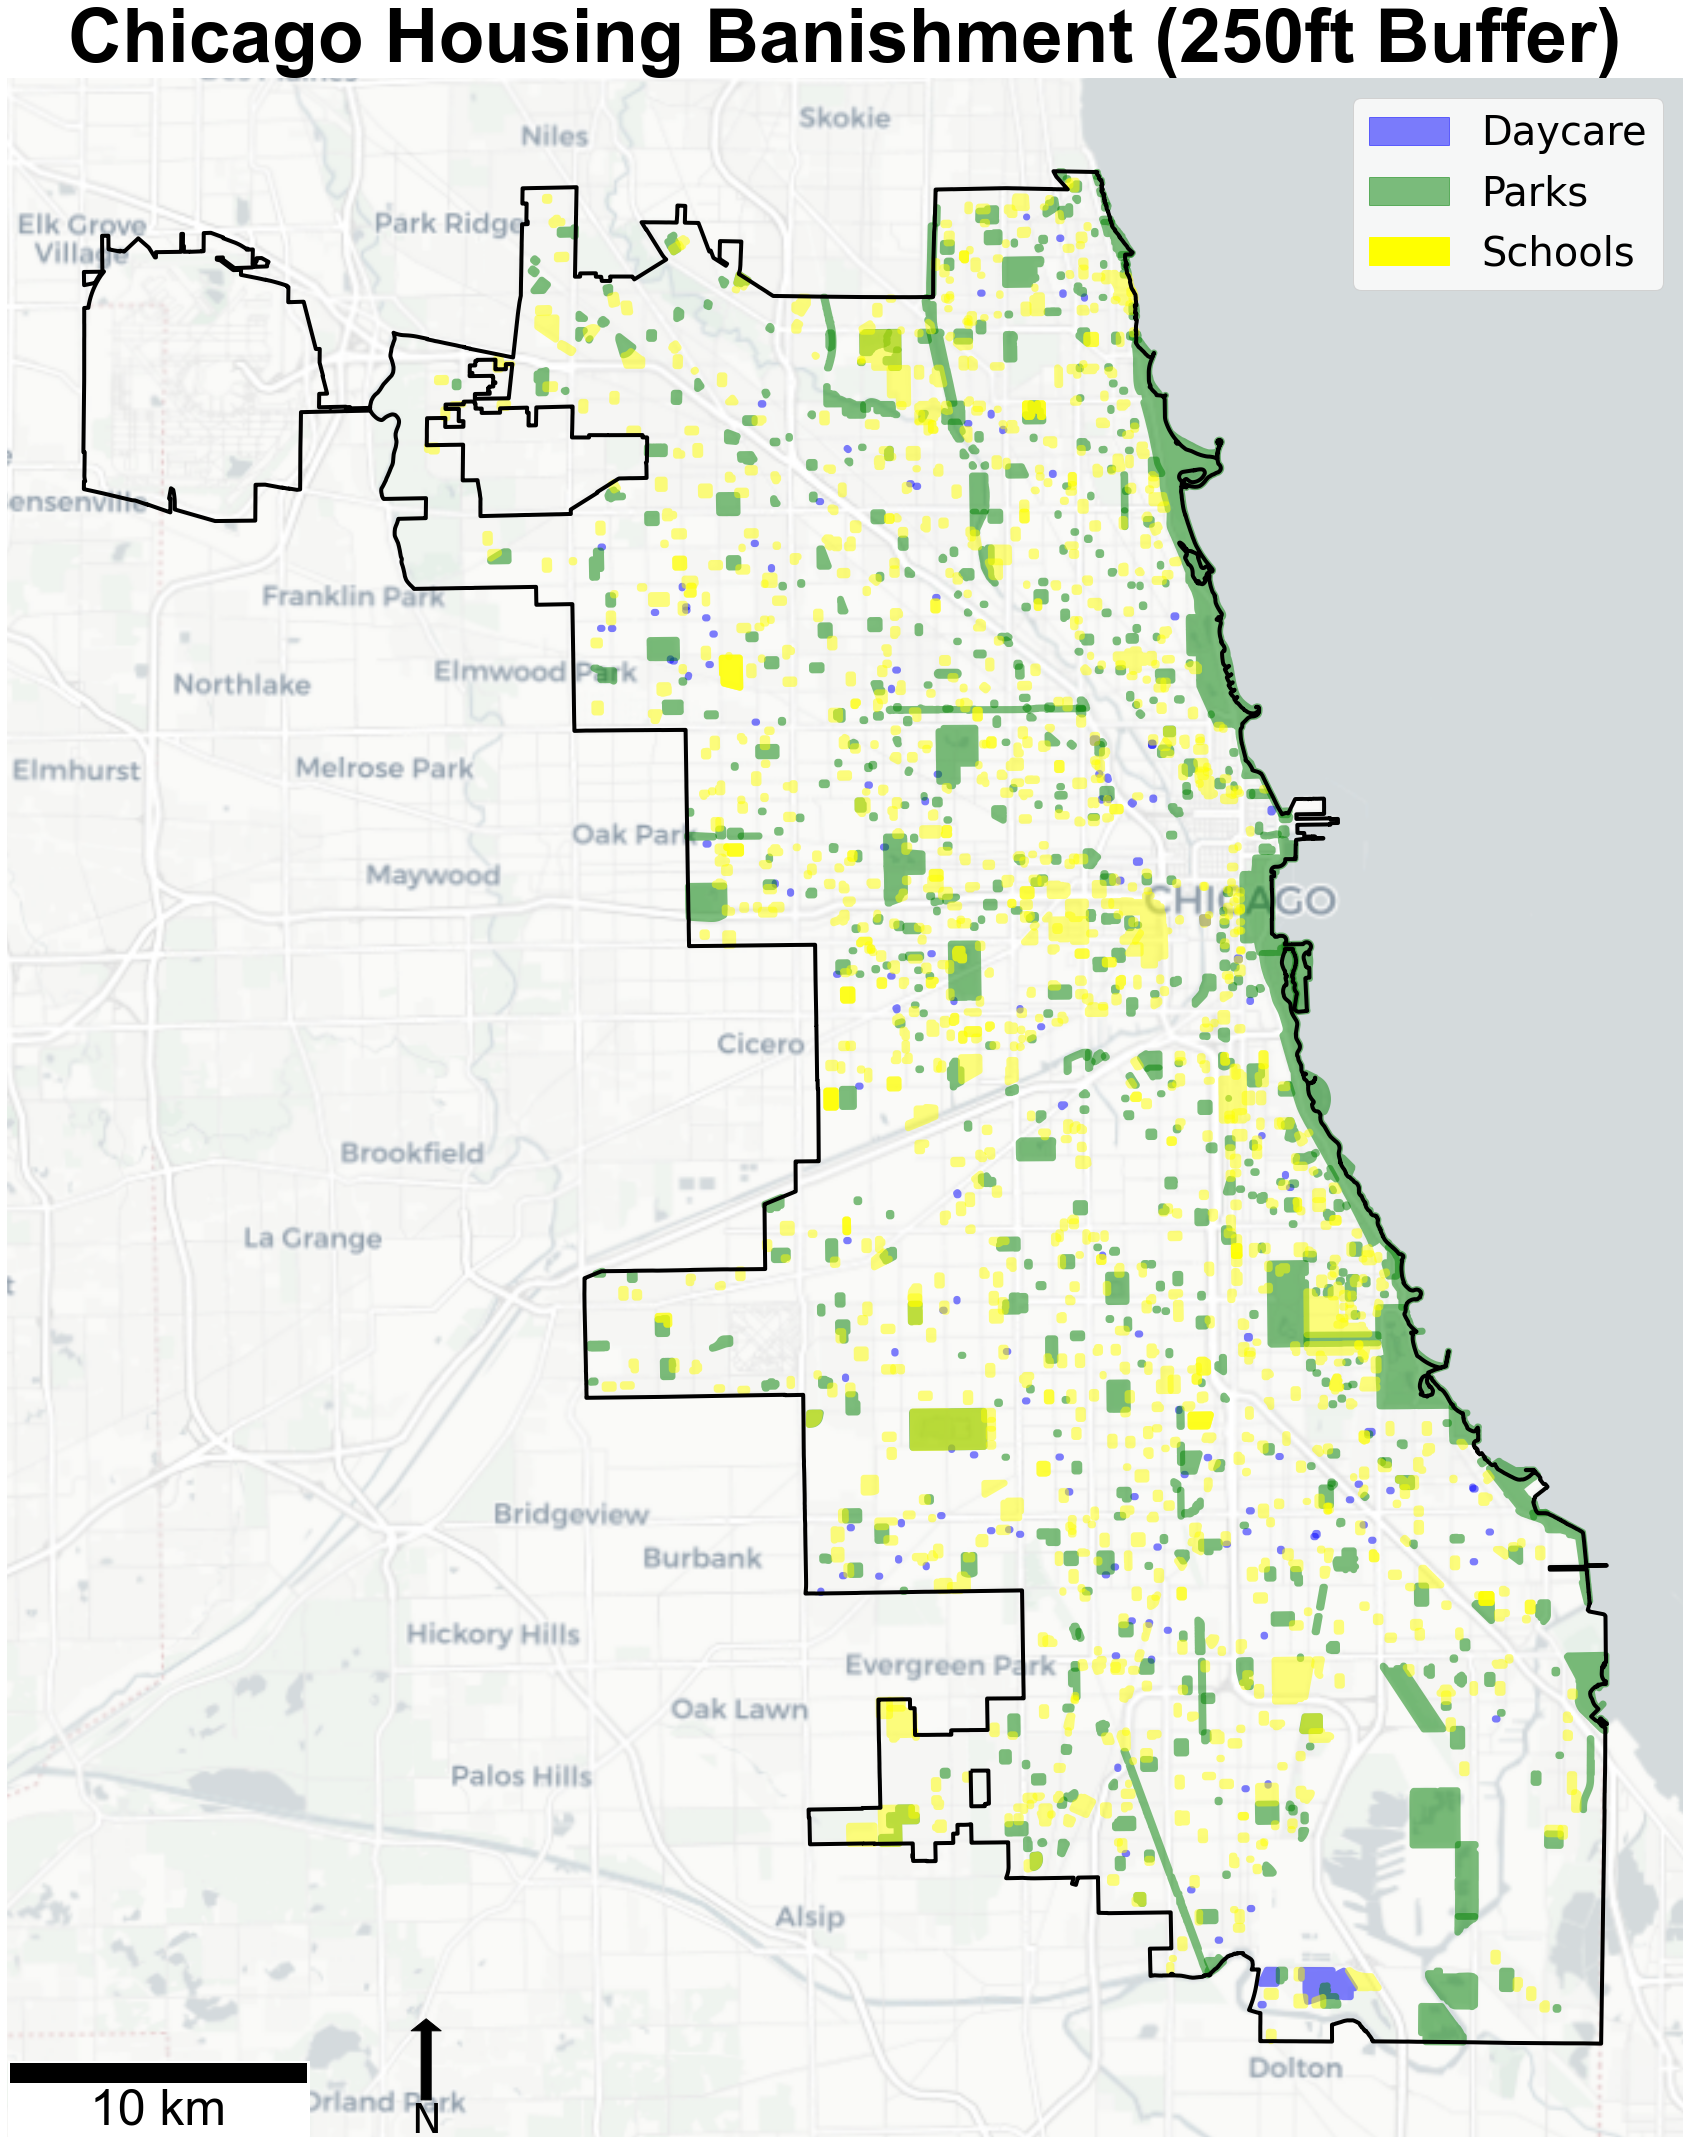

In [114]:
# 250 ft buffer map
# set basemap with Chicago Boundaries
basemap = chicago_boundaries.boundary.plot(color='k',
                                           figsize=(30,30),
                                          linewidth=4,
                                           label='Chicago Boundaries')

# add contextily basemap
ctx.add_basemap(basemap,crs=32616,source=ctx.providers.CartoDB.Positron)

# plot each geometry
daycare_buffer.plot(color='blue', ax=basemap, alpha=0.5)
daycare_leg = mpatches.Patch(color='blue', label='Daycare', alpha=0.5)

parks_buffer.plot(color='green',ax=basemap, alpha=0.5)
parks_leg = mpatches.Patch(color='green',label='Parks', alpha=0.5)

schools_buffer.plot(color='yellow',ax=basemap, alpha=0.5)
schools_leg = mpatches.Patch(color='yellow', label='Schools')

# turn off axies
basemap.axis('off')

# legend
basemap.legend(prop={'size':40}, handles=[
                                          daycare_leg, 
                                          parks_leg, 
                                          schools_leg])

# turn off axies
basemap.axis('off')

# set title
basemap.set_title('Chicago Housing Banishment (250ft Buffer)', fontdict={'size':75,
                                                            'weight':'bold',
                                                            'family':'arial'})

# add scale bar
basemap.add_artist(ScaleBar(dx=1.5,
                            location="lower left", 
                            font_properties={'family':'arial','size':50}, 
                            frameon=True,fixed_units='m'))

# add north arrow
x, y, arrow_length = 0.25, 0.0575, 0.05
basemap.annotate('N', xy=(x,y), xytext=(x, y-arrow_length),
                arrowprops=dict(facecolor='k', width=10, headwidth=30),
                va='center',ha='center', fontsize=40,
                xycoords=basemap.transAxes)

plt.tight_layout()
plt.savefig('./images/chicago_housing_banishment_250ft_buffer.png', transparent=True)
plt.show()

### Next Steps?

- Could be to merge all (3) housing banishment data frames into one, develop banishment zones, and overlay with census rent data.

- Show what eliminating daycares would do?

## Public Presence Banishment

- Any school
- Any public park building
- Any playground or recreation area
- Any public park
- Within 500ft of a public way or park whilst someone under the age of 18 is present
- Any daycare center
- Any county fair (when persons under the age of 18 are present)

To satisfy the above mandate, we will work with:
- Schools
- Daycre
- Parks
- Bike Paths (public way)
- Forest Preserves (public way)
- Open spaces - Boulevards zip? 


In [61]:
# make list of public banishment places
public_banishment = [schools_buffer, daycare_buffer, parks_buffer,bike_routes_buffer, 
                     forestry_buffer,opens_spaces_buffer]

In [115]:
# set geometry to standard non-buffered  geom
for gdf in public_banishment:
    gdf.set_geometry(col='geometry', inplace=True)

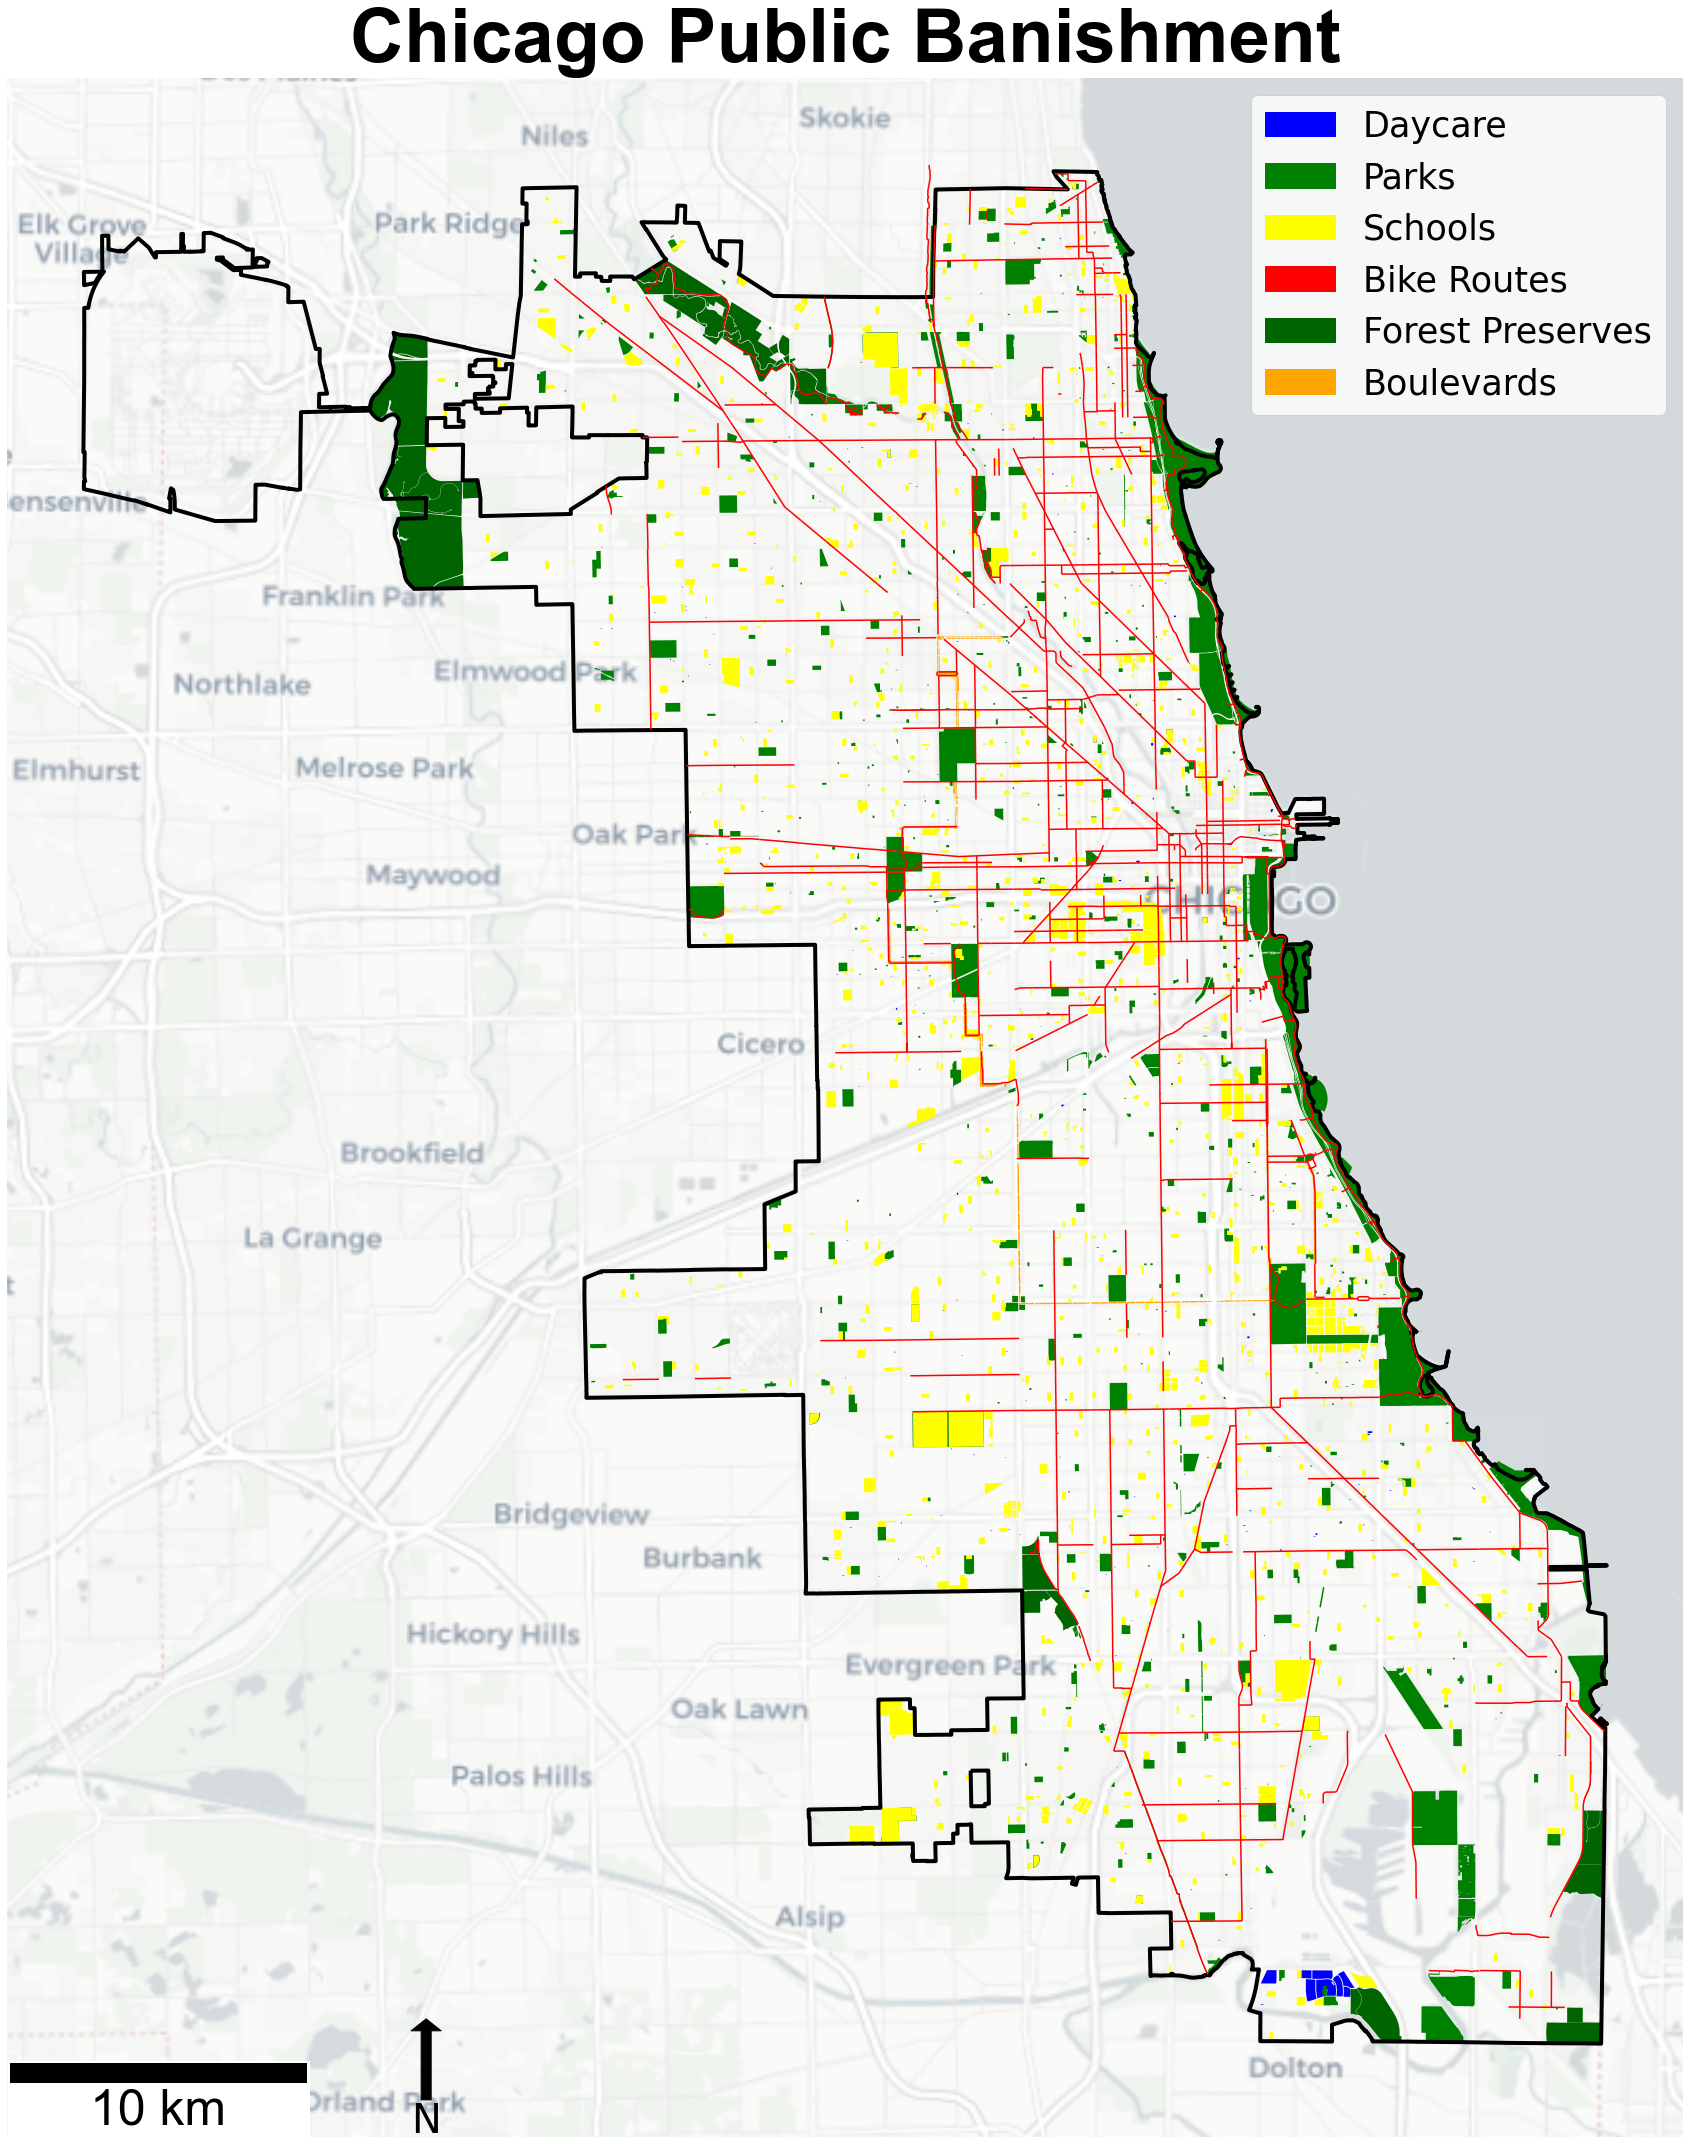

In [116]:
# public presence banishment map
# set basemap with Chicago Boundaries
basemap = chicago_boundaries.boundary.plot(color='k',
                                           figsize=(30,30),
                                          linewidth=4,
                                           label='Chicago Boundaries')

# add contextily basemap
ctx.add_basemap(basemap,crs=32616,source=ctx.providers.CartoDB.Positron)

# plot each geometry
daycare_buffer.plot(color='blue', ax=basemap)
daycare_leg = mpatches.Patch(color='blue', label='Daycare')

parks_buffer.plot(color='green',ax=basemap)
parks_leg = mpatches.Patch(color='green',label='Parks')

schools_buffer.plot(color='yellow',ax=basemap)
schools_leg = mpatches.Patch(color='yellow', label='Schools')

bike_routes_buffer.plot(color='red', ax=basemap)
bike_routes_buffer_leg = mpatches.Patch(color='red', label='Bike Routes')

forestry_buffer.plot(color='darkgreen', ax=basemap)
forestry_buffer_leg = mpatches.Patch(color='darkgreen', label='Forest Preserves')

opens_spaces_buffer.plot(color='orange', ax=basemap)
opens_spaces_buffer_leg = mpatches.Patch(color='orange', label='Boulevards')

# turn off axies
basemap.axis('off')

# legend
basemap.legend(prop={'size':35}, handles=[
                                          daycare_leg, 
                                          parks_leg, 
                                          schools_leg,
                                          bike_routes_buffer_leg,
                                          forestry_buffer_leg, opens_spaces_buffer_leg])

# turn off axies
basemap.axis('off')

# set title
basemap.set_title('Chicago Public Banishment', fontdict={'size':75,
                                                            'weight':'bold',
                                                            'family':'arial'})

# add scale bar
basemap.add_artist(ScaleBar(dx=1.5,
                            location="lower left", 
                            font_properties={'family':'arial','size':50}, 
                            frameon=True,fixed_units='m'))

# add north arrow
x, y, arrow_length = 0.25, 0.0575, 0.05
basemap.annotate('N', xy=(x,y), xytext=(x, y-arrow_length),
                arrowprops=dict(facecolor='k', width=10, headwidth=30),
                va='center',ha='center', fontsize=40,
                xycoords=basemap.transAxes)

plt.tight_layout()
plt.savefig('./images/chicago_public_banishment.png', transparent=True)
plt.show()